In [ ]:
!pip install shap

In [1]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Grouping_Datasets/Female_Older.csv", index_col=0)
data

,com01,com02,com03,com07,com08,com09,com10,com13,com15,com16,...,lab11,lab12,lab14,physical01,physical02,physical03,physical04,physical05,physical06,phq_sum
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,0.743,0.69,1.57,103.5,155.9,42.6,143.0,76.0,80.0,0.0
6,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,1.245,0.28,1.57,98.7,151.5,43.0,154.0,76.0,59.0,1.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.261,0.58,1.57,65.6,154.9,27.3,122.0,79.0,63.0,7.0
11,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0.696,0.24,1.57,130.2,161.8,49.7,157.0,97.0,77.0,8.0
16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0.923,0.36,1.57,75.9,171.8,25.7,136.0,75.0,68.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,...,0.813,3.30,1.57,46.4,148.9,20.9,128.0,71.0,52.0,1.0
5508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,0.857,0.20,1.57,94.0,168.5,33.1,135.0,82.0,70.0,2.0
5512,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,...,1.938,2.18,1.57,82.2,164.3,30.5,120.0,74.0,72.0,5.0


In [3]:
print(data.columns)

Index(['com01', 'com02', 'com03', 'com07', 'com08', 'com09', 'com10', 'com13',
       'com15', 'com16', 'demo01', 'demo02', 'demo03', 'demo05', 'demo06',
       'demo07', 'demo08', 'demo10', 'demo11', 'demo12', 'func01', 'func02',
       'func03', 'func04', 'func05', 'func06', 'func07', 'habit01', 'habit04',
       'habit05', 'habit06', 'habit08', 'habit09', 'healthcare01',
       'healthcare02', 'healthcare04', 'job01', 'job02', 'job04', 'lab04',
       'lab06', 'lab08', 'lab10', 'lab11', 'lab12', 'lab14', 'physical01',
       'physical02', 'physical03', 'physical04', 'physical05', 'physical06',
       'phq_sum'],
      dtype='object')


In [4]:
X = data.drop(columns=["phq_sum"])
y = data["phq_sum"]

In [5]:
X

,com01,com02,com03,com07,com08,com09,com10,com13,com15,com16,...,lab10,lab11,lab12,lab14,physical01,physical02,physical03,physical04,physical05,physical06
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,3.96,0.743,0.69,1.57,103.5,155.9,42.6,143.0,76.0,80.0
6,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,...,9.46,1.245,0.28,1.57,98.7,151.5,43.0,154.0,76.0,59.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,...,0.94,0.261,0.58,1.57,65.6,154.9,27.3,122.0,79.0,63.0
11,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,...,1.41,0.696,0.24,1.57,130.2,161.8,49.7,157.0,97.0,77.0
16,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,13.70,0.923,0.36,1.57,75.9,171.8,25.7,136.0,75.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,...,1.18,0.813,3.30,1.57,46.4,148.9,20.9,128.0,71.0,52.0
5508,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,...,1.37,0.857,0.20,1.57,94.0,168.5,33.1,135.0,82.0,70.0
5512,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,5.0,...,1.11,1.938,2.18,1.57,82.2,164.3,30.5,120.0,74.0,72.0


In [6]:
y.shape

(1524,)

In [7]:
datasets = ["Grouping_Datasets/Female_Older.csv", 
            "Grouping_Datasets/Female_Younger.csv", 
            "Grouping_Datasets/Male_Older.csv", 
            "Grouping_Datasets/Male_Younger.csv"]

best_hyperparams = {'n_estimators': 50, 'max_depth': 10}

Processing Grouping_Datasets/Female_Older.csv...


/tmp/ipykernel_808/1158954383.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_results = pd.concat([


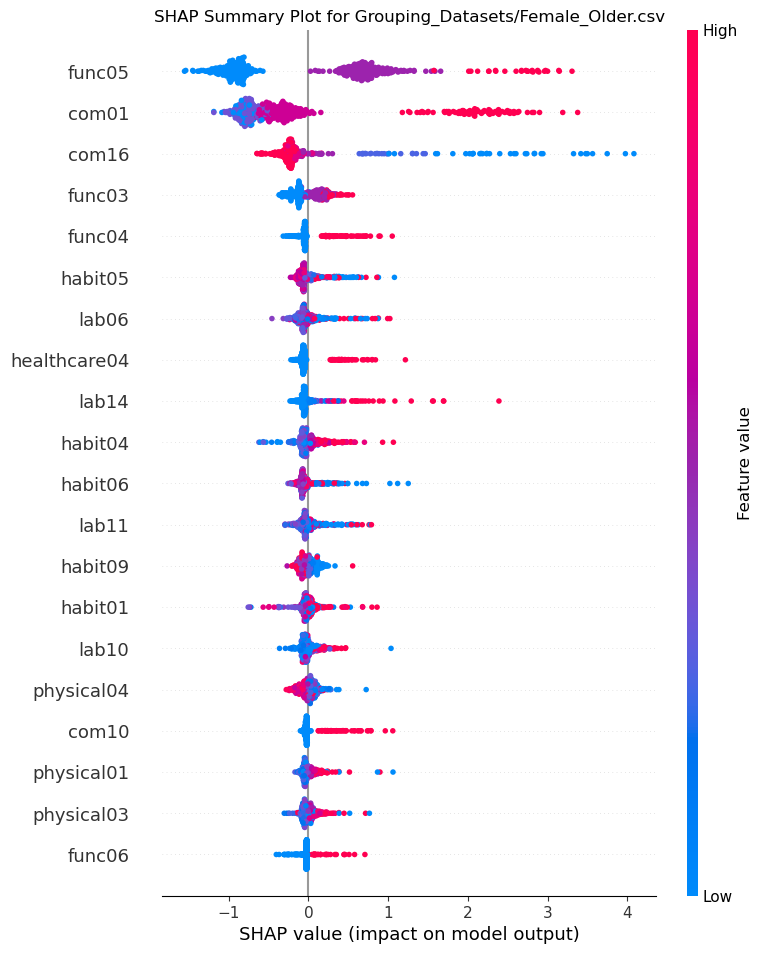

Processing Grouping_Datasets/Female_Younger.csv...


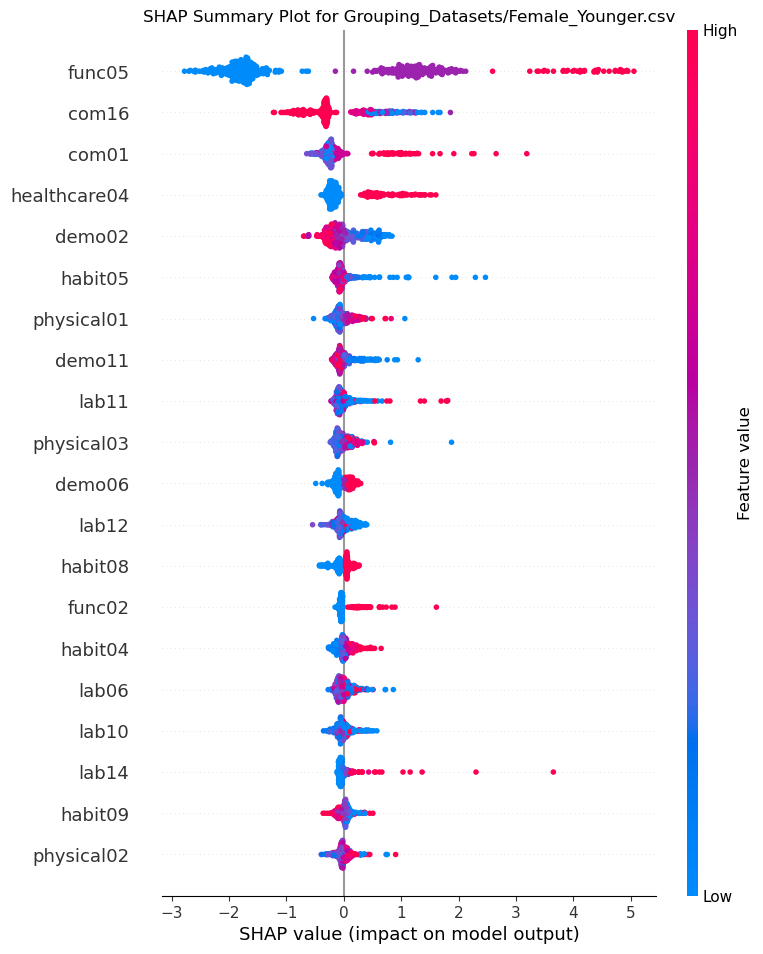

Processing Grouping_Datasets/Male_Older.csv...


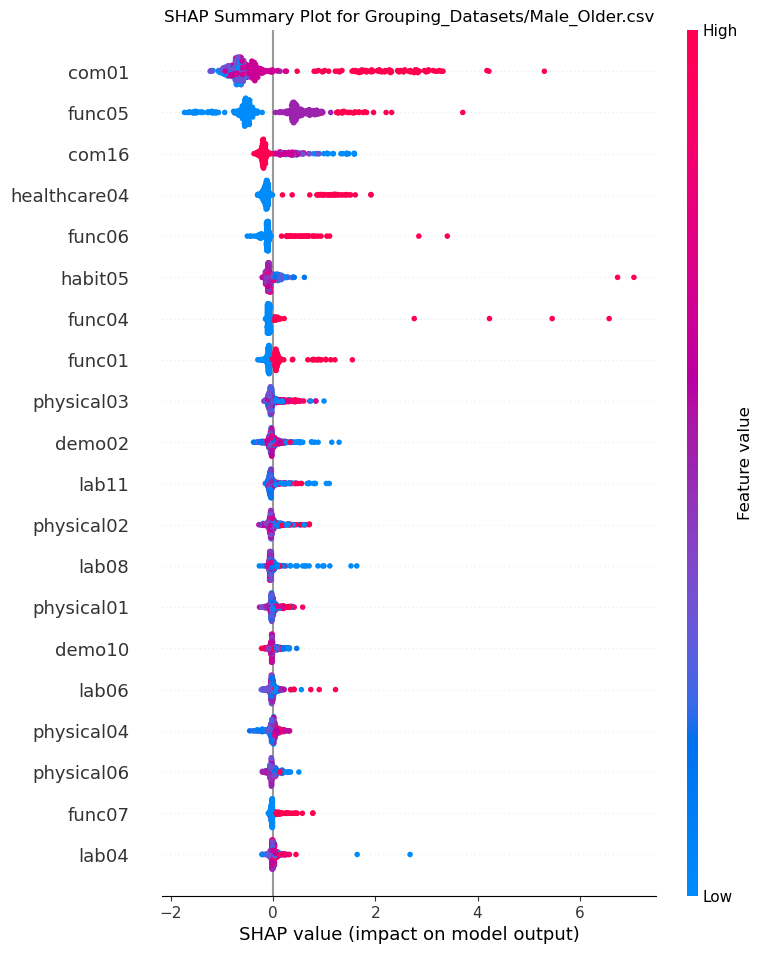

Processing Grouping_Datasets/Male_Younger.csv...


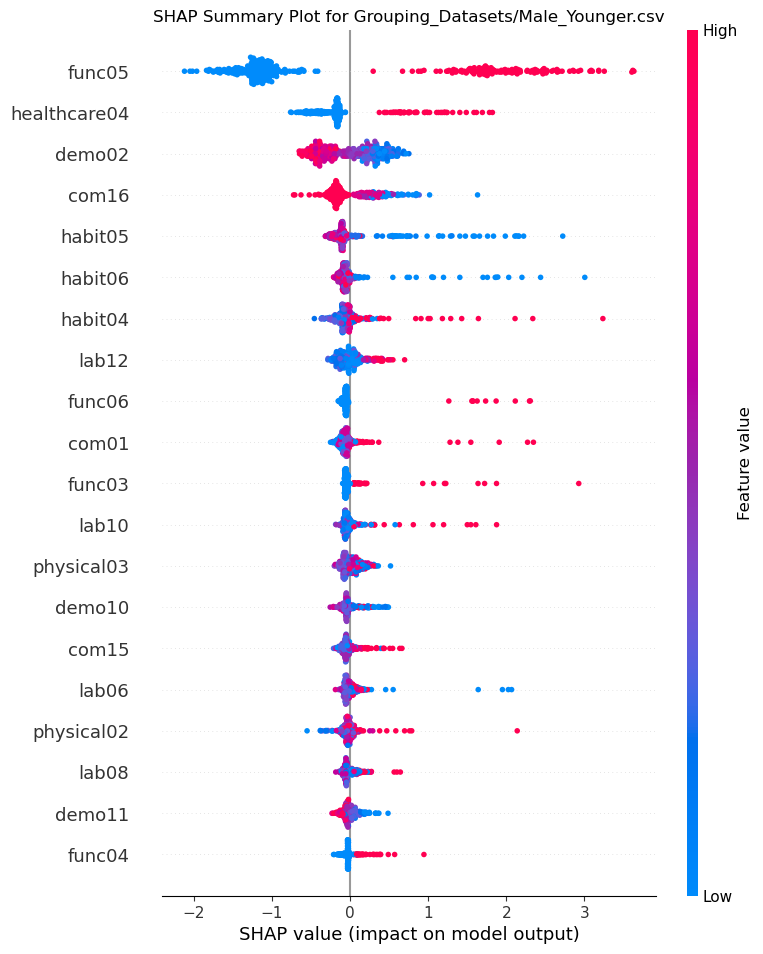

Evaluation Results:
                                Dataset        MSE    RMSE
0    Grouping_Datasets/Female_Older.csv  13.841212  3.7204
1  Grouping_Datasets/Female_Younger.csv  17.189165  4.1460
2      Grouping_Datasets/Male_Older.csv  12.165318  3.4879
3    Grouping_Datasets/Male_Younger.csv  19.600856  4.4273


In [8]:
all_results = pd.DataFrame(columns=["Dataset", "MSE", "RMSE"])

for dataset in datasets:
    print(f"Processing {dataset}...")
    data = pd.read_csv(dataset, index_col=0)
    
    X = data.drop(columns=["phq_sum"])
    y = data["phq_sum"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    rf_model = RandomForestRegressor(
        n_estimators=best_hyperparams['n_estimators'], 
        max_depth=best_hyperparams['max_depth'], 
        random_state=42)
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = round(mse**(1/2),4)
    
    all_results = pd.concat([
        all_results,
        pd.DataFrame({"Dataset": [dataset], "MSE": [mse], "RMSE": [rmse]})], ignore_index=True)
        
    # SHAP analysis
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_test)
        
    # SHAP summary plot
    plt.figure()
    shap.summary_plot(shap_values, X_test, show=False)
    plt.title(f"SHAP Summary Plot for {dataset}")
    plt.show()

# Print evaluation results
print("Evaluation Results:")
print(all_results)